In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [98]:
file_path = r"C:\Users\Nathan\Documents\WGU\D603\Task 3\medical_clean.csv"
df = pd.read_csv(file_path)
print(df.head())

   Day   Revenue
0    1  0.000000
1    2 -0.292356
2    3 -0.327772
3    4 -0.339987
4    5 -0.124888


In [99]:
print(df.isnull().sum())
print(df.dtypes)

Day        0
Revenue    0
dtype: int64
Day          int64
Revenue    float64
dtype: object


In [100]:
df.columns = df.columns.str.strip()

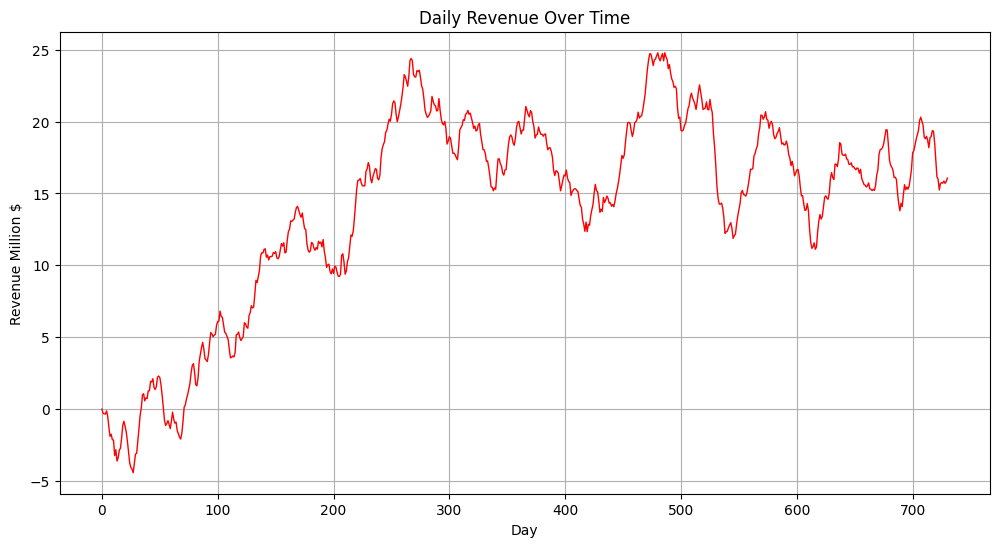

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Revenue'], label='Revenue', color='red', linewidth=1)
plt.title('Daily Revenue Over Time')
plt.xlabel('Day')
plt.ylabel('Revenue Million $')
plt.grid(True)
plt.show()

In [102]:
result = adfuller(df['Revenue'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values", result[4])

ADF Statistic: -2.2183190476089467
p-value: 0.19966400615064306
Critical Values {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}


In [103]:
df['Revenue_Diff'] = df['Revenue'].diff().dropna()
result_diff = adfuller(df['Revenue_Diff'].dropna())
print("ADF Statistic (Differenced):", result_diff[0])
print("p-value (Differenced):", result_diff[1])
print("Critical Values (Differenced):", result_diff[4])

ADF Statistic (Differenced): -17.374772303557062
p-value (Differenced): 5.113206978840171e-30
Critical Values (Differenced): {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}


In [104]:
df.to_csv("revenue_with_diff.csv", index=True)

In [105]:
df_diff = df['Revenue_Diff'].dropna()

train_size = int(len(df_diff) * 0.8)
train, test = df_diff[:train_size], df_diff[train_size:]
print("Train size:", len(train))
print("Test size:", len(test))

Train size: 584
Test size: 146
